In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, linewidth=2*75, suppress=False)
from IPython.display import clear_output
from rise_and_fall import *
from dataset import Dataset
import json
import time
from neural_network import buy_predictor

In [ ]:
def plot_frame(f:pd.DataFrame, mxis=[], mnis=[], mark=None):
    ps = f["meanp"].to_numpy()
    mn = ps.min()
    mx = ps.max()
    plt.plot(ps)
    if len(mxis)>0:
        plt.vlines(x = mxis, ymin = mn, ymax = mx, colors = 'green',)
    elif 'mxis' in f.columns:
        plt.vlines(x = f.index[f['mxis']>0], ymin = mn, ymax = mx, colors = 'green',)
    if len(mnis)>0:
        plt.vlines(x = mnis, ymin = mn, ymax = mx, colors = 'red',)
    elif 'mnis' in f.columns:
        plt.vlines(x = f.index[f['mnis']>0], ymin = mn, ymax = mx, colors = 'red',)
    if mark is not None:
        plt.vlines(x = [mark], ymin = mn, ymax = mx, colors = 'blue',)
    plt.show()
    
def unique(xs):
    ys = []
    for x in xs:
        if x in ys:
            continue
        ys.append(x)
    return ys

0.00030857096359264804


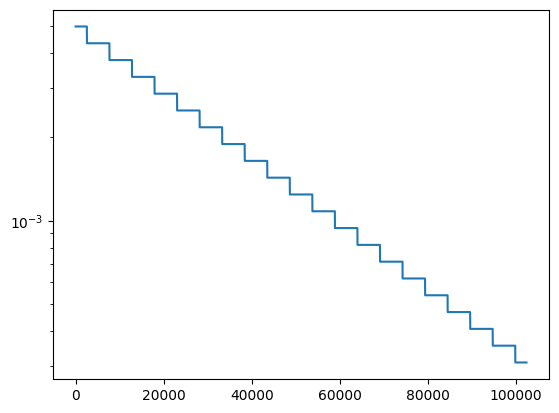

In [20]:
initial_learning_rate = 0.005
decay_rate=0.87
decay_steps=1024*5
y = lambda step: initial_learning_rate * (decay_rate ** (np.round(step / decay_steps, 0)))

steps = np.array([i for i in range(int(100*1024))])
plt.semilogy(steps, y(steps))
print(y(steps)[-1])